<a href="https://colab.research.google.com/github/diego-ciciani01/ADM---HW5/blob/main/main_es1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**To download the dataser from kaggle**

In [ ]:
#!pip install kaggle

In [ ]:
#%cd /content/drive/MyDrive/Colab Notebooks/università/ADM/Homework_5/dataset

/content/drive/MyDrive/Colab Notebooks/università/ADM/Homework_5/dataset


In [ ]:
#import os
#os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/università/ADM/Homework_5/dataset'

In [ ]:
#!kaggle datasets download -d mathurinache/citation-network-dataset

In [ ]:
#!unzip citation-network-dataset.zip

Es 1

In [ ]:
pip install ijson

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 kB 2.3 MB/s eta 0:00:00


In [ ]:
import networkx as nx
import pandas as pd
import json
import ijson
import time
import csv
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
import ast
from itertools import combinations

In [ ]:
citation_graph = nx.DiGraph()
collaboration_graph = nx.Graph()

In [ ]:
small_dataset = False

if small_dataset == True:
  start = time.process_time()

  PAPER = []
  Author = []


  with open('/content/drive/MyDrive/Colab Notebooks/università/ADM/Homework_5/dataset/dblp.v12.json', "rb") as f, open("./output.csv", "w", newline="") as csvfile:
      fieldnames = ['id', 'title', 'year', 'authors', 'n_citation', 'doc_type',
                    'reference_count', 'references', 'doi', 'publisher']
      writer = csv.DictWriter(csvfile, fieldnames=fieldnames, escapechar='\\')
      writer.writeheader()

      for i, element in enumerate(ijson.items(f, "item")):
          paper = {}
          paper['id'] = element['id']
          paper['title'] = element['title']

          year = element.get('year')
          if year:
              paper['year'] = year
          else:
              paper['year'] = np.nan

          author = element.get('authors')
          if author:
              paper['authors'] = author
          else:
              paper['authors'] = np.nan

          n_citation = element.get('n_citation')
          if n_citation:
              paper['n_citation'] = n_citation
          else:
              paper['n_citation'] = np.nan

          doc_type = element.get('doc_type')
          if doc_type:
              paper['doc_type'] = doc_type
          else:
              paper['doc_type'] = np.nan

          references = element.get('references')
          if references:
              paper['reference_count'] = len(references)
              paper['references'] = ';'.join(str(int(r)) for r in references)
          else:
              paper['references'] = np.nan
              paper['reference_count'] = np.nan

          doi = element.get('doi')
          if doi:
              paper['doi'] = f"https://doi.org/{doi}"
          else:
              paper['doi'] = np.nan


          publisher= element.get('publisher')
          if publisher:
              paper['publisher']=publisher
          else:
              paper['publisher']=np.nan

          writer.writerow(paper)

          if i % 46000 == 0:
              print(f"{i}:{round((time.process_time() - start), 2)}s ", end="")


In [ ]:
path_dataset = "/content/drive/MyDrive/Colab Notebooks/università/ADM/Homework_5/dataset/output.csv"

In [ ]:
df = pd.read_csv(path_dataset)

In [ ]:
df.head()

,id,title,year,authors,n_citation,doc_type,reference_count,references,doi,publisher
0,1091,Preliminary Design of a Network Protocol Learn...,2013.0,"[{'name': 'Makoto Satoh', 'org': 'Shinshu Univ...",1.0,Conference,2.0,2005687710;2018037215,https://doi.org/10.1007/978-3-642-39476-8_19,"Springer, Berlin, Heidelberg"
1,1388,Further Results on Independence in Direct-Prod...,2000.0,"[{'name': 'Pranava K. Jha', 'id': 2718958994}]",1.0,Journal,NaN,NaN,NaN,NaN
2,1674,A methodology for the physically accurate visu...,2011.0,"[{'name': 'G. Beale', 'org': 'Archaeological C...",1.0,Conference,15.0,1535888970;1992876689;1993710814;2035653341;20...,https://doi.org/10.2312/VAST/VAST11/137-144,Eurographics Association
3,1688,"Comparison of GARCH, Neural Network and Suppor...",2009.0,"[{'name': 'Altaf Hossain', 'org': 'Department ...",6.0,Conference,3.0,1560724230;1986968751;2156909104,https://doi.org/10.1007/978-3-642-11164-8_97,"Springer, Berlin, Heidelberg"
4,5411,COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,2009.0,"[{'name': 'Rafael Álvarez', 'id': 2125293936},...",NaN,Conference,NaN,NaN,NaN,NaN


In [ ]:
# Ordina il DataFrame in base al numero di citazioni in ordine decrescente
df_sorted = df.sort_values(by='n_citation', ascending=False)

# Seleziona i primi 10.000 documenti
top_10000_documents = df_sorted.head(10000)

df_sorted = top_10000_documents.dropna(subset=['id'])

In [ ]:
df_sorted.tail()

,id,title,year,authors,n_citation,doc_type,reference_count,references,doi,publisher
794854,1964830323,An overview of JML tools and applications,2005.0,"[{'name': 'Lilian Burdy', 'org': 'INRIA Sophia...",596.0,Conference,82.0,1486696980;1489778371;1492315860;1498946538;14...,https://doi.org/10.1007/s10009-004-0167-4,Springer-Verlag
2109151,2101699859,Countering code-injection attacks with instruc...,2003.0,"[{'name': 'Gaurav S. Kc', 'org': 'Columbia Uni...",596.0,Conference,42.0,186343359;1481758559;1499992849;1508969946;151...,https://doi.org/10.1145/948109.948146,ACM
2366931,2124609748,Gaussian Process Dynamical Models for Human Mo...,2008.0,"[{'name': 'J.M. Wang', 'org': 'University of T...",596.0,Conference,61.0,1505866674;1546296670;1598702468;1643263348;19...,https://doi.org/10.1109/TPAMI.2007.1167,IEEE Computer Society
2621703,2147343704,EVENODD: an efficient scheme for tolerating do...,1995.0,"[{'name': 'M. Blaum', 'org': 'IBM Almaden Rese...",596.0,Journal,9.0,1530042190;1531975040;1820898047;1829547464;20...,https://doi.org/10.1109/12.364531,IEEE Computer Society
2014229,2093212899,Simultaneous structure and texture image inpai...,2003.0,"[{'name': 'M. Bertalmio', 'org': 'Dept. de Tec...",596.0,Journal,22.0,1488881187;1565233179;1569587969;1983661653;19...,https://doi.org/10.1109/TIP.2003.815261,IEEE


In [ ]:
def fill_nodes_citation(data, G):
    for _, row in data.iterrows():
        paper_id = row['id']
        references_str = row['references']

        # Convert the references string to a list of integers
        references = [int(ref) for ref in str(references_str).split(';') if ref.isdigit()]

        # Add edges to the graph if the reference exists in the dataset
        for ref in references:
            if ref in data['id'].values:
                G.add_edge(paper_id, ref)


In [ ]:
fill_nodes_citation(df_sorted, citation_graph)

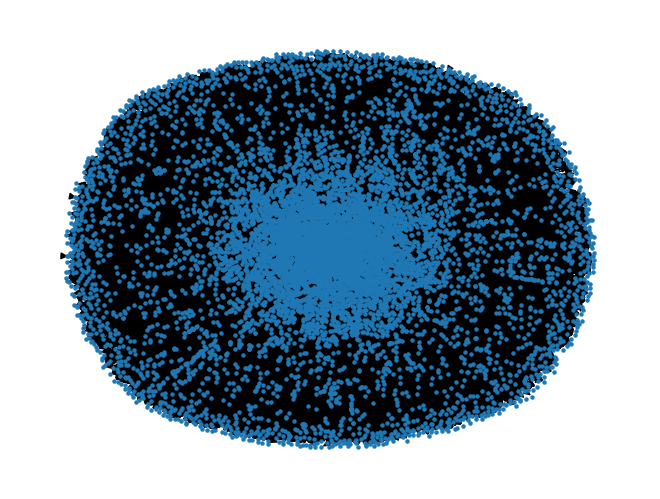

In [ ]:
# draw the graph
'''pos = nx.spring_layout(citation_graph)
nx.draw(citation_graph, pos, with_labels=False, node_size=5)
plt.show()'''

In [ ]:
def fill_nodes_collaboration(data, G):
    for _, row in data.iterrows():
        authors_str = row['authors']

        try:
            authors = ast.literal_eval(authors_str)
            # Estrai un identificatore univoco per ciascun autore (ad esempio, nome o ID)
            author_ids = [author.get('id') or author.get('name') for author in authors]
        except ValueError:
            author_ids = []

        author_pairs = list(combinations(author_ids, 2))

        for author_pair in author_pairs:
            if G.has_edge(*author_pair):
                G[author_pair[0]][author_pair[1]]['weight'] = G[author_pair[0]][author_pair[1]]['weight'] + 1 if 'weight' in G[author_pair[0]][author_pair[1]] else 1
            else:
                G.add_edge(author_pair[0], author_pair[1], weight=1)



In [ ]:
fill_nodes_collaboration(df_sorted, collaboration_graph)

In [ ]:
collaboration_graph.number_of_nodes()

20193

In [ ]:
collaboration_graph.size()

136453

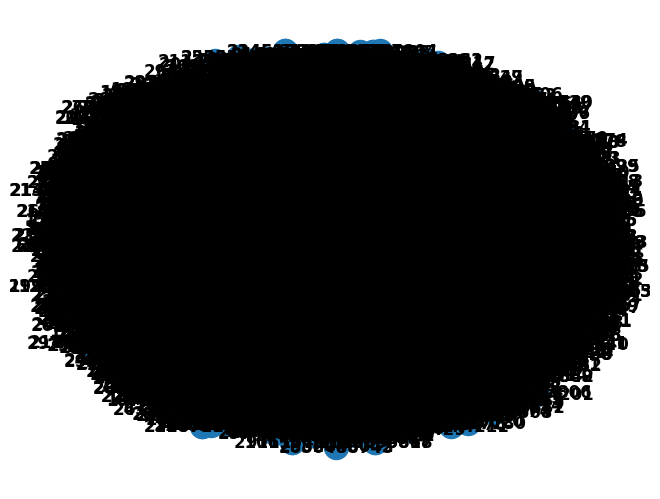

In [ ]:
pos = nx.spring_layout(collaboration_graph)

# Draw the graph
nx.draw(collaboration_graph, pos, with_labels=True, font_weight='bold')

# show
plt.show()
